# Part 1: Image classification

1. Set your random seed to 1234
2. Load the MNIST dataset

In [3]:
import random
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(1234)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size = 0.16666, random_state = 1234)

Using TensorFlow backend.


11493376/11490434 [==============================] - 4s 0us/step


3.Implement a series of neural network models
    
    i.Initial test

In [6]:
network_org = models.Sequential()
network_org.add(layers.Dense(512, activation='relu', input_shape= (28 * 28,)))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(10, activation='softmax'))
network_org.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_org = network_org.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.5068 - acc: 0.8360 - val_loss: 0.1797 - val_acc: 0.9441
Epoch 2/200
50000/50000 [==============================] - 5s 96us/step - loss: 0.1585 - acc: 0.9526 - val_loss: 0.1148 - val_acc: 0.9641
Epoch 3/200
50000/50000 [==============================] - 5s 98us/step - loss: 0.0972 - acc: 0.9702 - val_loss: 0.0844 - val_acc: 0.9743
Epoch 4/200
50000/50000 [==============================] - 5s 95us/step - loss: 0.0661 - acc: 0.9799 - val_loss: 0.0721 - val_acc: 0.9790
Epoch 5/200
50000/50000 [==============================] - 5s 95us/step - loss: 0.0463 - acc: 0.9859 - val_loss: 0.0897 - val_acc: 0.9748
Epoch 6/200
50000/50000 [==============================] - 5s 96us/step - loss: 0.0356 - acc: 0.9894 - val_loss: 0.0984 - val_acc: 0.9727
Epoch 7/200
50000/50000 [==============================] - 5s 99us/step - loss: 0.0282 - acc: 0.9912 - val_loss: 0.0907 -

Epoch 118/200
50000/50000 [==============================] - 5s 106us/step - loss: 0.0048 - acc: 0.9993 - val_loss: 0.1957 - val_acc: 0.9804
Epoch 119/200
50000/50000 [==============================] - 5s 95us/step - loss: 0.0035 - acc: 0.9995 - val_loss: 0.1688 - val_acc: 0.9830
Epoch 120/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.0107 - acc: 0.9988 - val_loss: 0.2187 - val_acc: 0.9799
Epoch 121/200
50000/50000 [==============================] - 6s 129us/step - loss: 0.0124 - acc: 0.9986 - val_loss: 0.1739 - val_acc: 0.9823
Epoch 122/200
50000/50000 [==============================] - 6s 118us/step - loss: 0.0067 - acc: 0.9991 - val_loss: 0.1925 - val_acc: 0.9817
Epoch 123/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.0096 - acc: 0.9987 - val_loss: 0.2587 - val_acc: 0.9750
Epoch 124/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.0044 - acc: 0.9993 - val_loss: 0.1614 - val_acc: 0.9835
Epoch 125/200


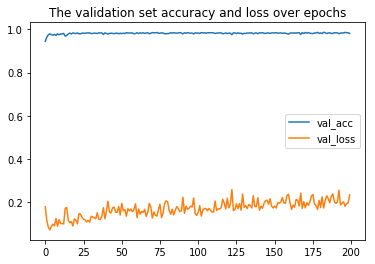

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

val_acc = result_org.history['val_acc']
val_loss = result_org.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.legend(['val_acc', 'val_loss'])
plt.title('The validation set accuracy and loss over epochs')
plt.show()

From around epoch 42, the model starts to perform worse and worse based on the validation dataset.

    ii. Implement dropout

In [9]:
network_dropout = models.Sequential()
network_dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10, activation='softmax'))
network_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_dropout = network_dropout.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 142us/step - loss: 0.7243 - acc: 0.7620 - val_loss: 0.2228 - val_acc: 0.9315
Epoch 2/200
50000/50000 [==============================] - 6s 130us/step - loss: 0.2653 - acc: 0.9216 - val_loss: 0.1633 - val_acc: 0.9496
Epoch 3/200
50000/50000 [==============================] - 6s 128us/step - loss: 0.1967 - acc: 0.9450 - val_loss: 0.1201 - val_acc: 0.9642
Epoch 4/200
50000/50000 [==============================] - 7s 130us/step - loss: 0.1660 - acc: 0.9535 - val_loss: 0.1053 - val_acc: 0.9695
Epoch 5/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.1427 - acc: 0.9596 - val_loss: 0.1025 - val_acc: 0.9713
Epoch 6/200
50000/50000 [==============================] - 6s 130us/step - loss: 0.1289 - acc: 0.9638 - val_loss: 0.0917 - val_acc: 0.9724
Epoch 7/200
50000/50000 [==============================] - 6s 116us/step - loss: 0.1162 - acc: 0.9673 - val_loss: 0.

50000/50000 [==============================] - 7s 136us/step - loss: 0.0668 - acc: 0.9905 - val_loss: 0.1219 - val_acc: 0.9827
Epoch 118/200
50000/50000 [==============================] - 7s 145us/step - loss: 0.0561 - acc: 0.9913 - val_loss: 0.1174 - val_acc: 0.9841
Epoch 119/200
50000/50000 [==============================] - 7s 136us/step - loss: 0.0571 - acc: 0.9917 - val_loss: 0.1185 - val_acc: 0.9835
Epoch 120/200
50000/50000 [==============================] - 7s 141us/step - loss: 0.0639 - acc: 0.9916 - val_loss: 0.1337 - val_acc: 0.9825
Epoch 121/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.0554 - acc: 0.9918 - val_loss: 0.1207 - val_acc: 0.9836
Epoch 122/200
50000/50000 [==============================] - 7s 139us/step - loss: 0.0646 - acc: 0.9915 - val_loss: 0.1247 - val_acc: 0.9843
Epoch 123/200
50000/50000 [==============================] - 7s 139us/step - loss: 0.0680 - acc: 0.9909 - val_loss: 0.1119 - val_acc: 0.9834
Epoch 124/200
50000/50000 [

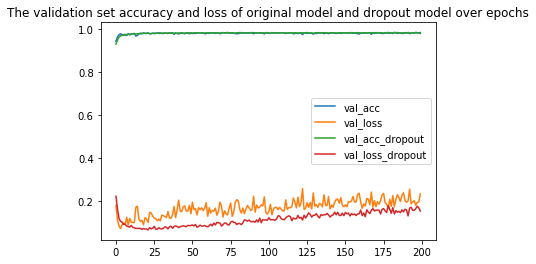

In [10]:
val_acc = result_org.history['val_acc']
val_loss = result_org.history['val_loss']
val_acc_dropout = result_dropout.history['val_acc']
val_loss_dropout = result_dropout.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.plot(val_acc_dropout)
plt.plot(val_loss_dropout)
plt.legend(['val_acc', 'val_loss', 'val_acc_dropout', 'val_loss_dropout'])
plt.title('The validation set accuracy and loss of original model and dropout model over epochs')
plt.show()

This model perform slightly better compared with the old model in terms of val_loss, but the val_acc are really similar.

    iii.Weight regularization

In [11]:
network_l1 = models.Sequential()
network_l1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(10, activation='softmax'))
network_l1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l1 = network_l1.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 119us/step - loss: 13.7783 - acc: 0.6669 - val_loss: 4.1266 - val_acc: 0.7223
Epoch 2/200
50000/50000 [==============================] - 6s 113us/step - loss: 3.0588 - acc: 0.7929 - val_loss: 2.3736 - val_acc: 0.8509
Epoch 3/200
50000/50000 [==============================] - 6s 118us/step - loss: 2.1836 - acc: 0.8357 - val_loss: 2.0391 - val_acc: 0.8308
Epoch 4/200
50000/50000 [==============================] - 6s 118us/step - loss: 1.8568 - acc: 0.8606 - val_loss: 1.7495 - val_acc: 0.8688
Epoch 5/200
50000/50000 [==============================] - 6s 115us/step - loss: 1.6821 - acc: 0.8743 - val_loss: 1.6424 - val_acc: 0.8677
Epoch 6/200
50000/50000 [==============================] - 6s 118us/step - loss: 1.5538 - acc: 0.8866 - val_loss: 1.5123 - val_acc: 0.8886
Epoch 7/200
50000/50000 [==============================] - 6s 114us/step - loss: 1.4701 - acc: 0.8955 - val_loss: 1

50000/50000 [==============================] - 5s 102us/step - loss: 0.9029 - acc: 0.9588 - val_loss: 0.9040 - val_acc: 0.9576
Epoch 118/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.9009 - acc: 0.9596 - val_loss: 0.8973 - val_acc: 0.9593
Epoch 119/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.8986 - acc: 0.9602 - val_loss: 0.8995 - val_acc: 0.9589
Epoch 120/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.8989 - acc: 0.9595 - val_loss: 0.9187 - val_acc: 0.9528
Epoch 121/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.8992 - acc: 0.9595 - val_loss: 0.9144 - val_acc: 0.9552
Epoch 122/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.8970 - acc: 0.9603 - val_loss: 0.9365 - val_acc: 0.9453
Epoch 123/200
50000/50000 [==============================] - 5s 108us/step - loss: 0.8987 - acc: 0.9590 - val_loss: 0.8895 - val_acc: 0.9613
Epoch 124/200
50000/50000 [

In [12]:
network_l2 = models.Sequential()
network_l2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(10, activation='softmax'))
network_l2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2 = network_l2.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 137us/step - loss: 1.8150 - acc: 0.8194 - val_loss: 1.0183 - val_acc: 0.9410
Epoch 2/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.8292 - acc: 0.9371 - val_loss: 0.6318 - val_acc: 0.9493
Epoch 3/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.5360 - acc: 0.9513 - val_loss: 0.4578 - val_acc: 0.9517
Epoch 4/200
50000/50000 [==============================] - 6s 124us/step - loss: 0.3975 - acc: 0.9602 - val_loss: 0.4063 - val_acc: 0.9421
Epoch 5/200
50000/50000 [==============================] - 6s 124us/step - loss: 0.3308 - acc: 0.9648 - val_loss: 0.2976 - val_acc: 0.9681
Epoch 6/200
50000/50000 [==============================] - 6s 123us/step - loss: 0.2892 - acc: 0.9676 - val_loss: 0.2743 - val_acc: 0.9665
Epoch 7/200
50000/50000 [==============================] - 6s 116us/step - loss: 0.2532 - acc: 0.9729 - val_loss: 0.

50000/50000 [==============================] - 7s 132us/step - loss: 0.0802 - acc: 0.9927 - val_loss: 0.1866 - val_acc: 0.9628
Epoch 118/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.0854 - acc: 0.9911 - val_loss: 0.1262 - val_acc: 0.9792
Epoch 119/200
50000/50000 [==============================] - 5s 102us/step - loss: 0.0829 - acc: 0.9918 - val_loss: 0.1359 - val_acc: 0.9772
Epoch 120/200
50000/50000 [==============================] - 5s 100us/step - loss: 0.0805 - acc: 0.9927 - val_loss: 0.1470 - val_acc: 0.9743
Epoch 121/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.0834 - acc: 0.9917 - val_loss: 0.1348 - val_acc: 0.9767
Epoch 122/200
50000/50000 [==============================] - 5s 101us/step - loss: 0.0829 - acc: 0.9917 - val_loss: 0.1878 - val_acc: 0.9624
Epoch 123/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.0833 - acc: 0.9915 - val_loss: 0.1426 - val_acc: 0.9740
Epoch 124/200
50000/50000 [

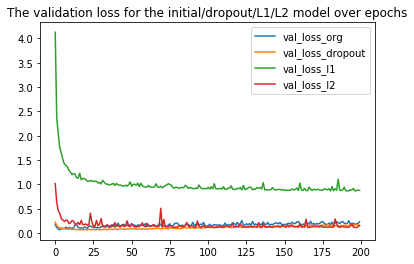

In [13]:
val_loss_org = result_org.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_l1 = result_l1.history['val_loss']
val_loss_l2 = result_l2.history['val_loss']
plt.plot(val_loss_org)
plt.plot(val_loss_dropout)
plt.plot(val_loss_l1)
plt.plot(val_loss_l2)
plt.legend(['val_loss_org', 'val_loss_dropout', 'val_loss_l1', 'val_loss_l2'])
plt.title('The validation loss for the initial/dropout/L1/L2 model over epochs')
plt.show()

The dropout-adding model appears to perform the best when the epoch number is smaller than 100, and the l2-loss model appears to perform the best when the epoch number is greater than 100.

    iv. Final model

In [14]:
network_best = models.Sequential()
network_best.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_best.add(layers.Dropout(0.5))
network_best.add(layers.Dense(512, activation='relu'))
network_best.add(layers.Dropout(0.5))
network_best.add(layers.Dense(512, activation='relu'))
network_best.add(layers.Dropout(0.5))
network_best.add(layers.Dense(512, activation='relu'))
network_best.add(layers.Dropout(0.5))
network_best.add(layers.Dense(10, activation='softmax'))
network_best.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_best = network_best.fit(train_images, train_labels, epochs=22, batch_size=512)

Epoch 1/22
50000/50000 [==============================] - 6s 120us/step - loss: 0.7277 - acc: 0.7573
Epoch 2/22
50000/50000 [==============================] - 6s 116us/step - loss: 0.2698 - acc: 0.9216
Epoch 3/22
50000/50000 [==============================] - 6s 119us/step - loss: 0.1967 - acc: 0.9440
Epoch 4/22
50000/50000 [==============================] - 6s 116us/step - loss: 0.1665 - acc: 0.9537
Epoch 5/22
50000/50000 [==============================] - 6s 122us/step - loss: 0.1394 - acc: 0.9604
Epoch 6/22
50000/50000 [==============================] - 6s 123us/step - loss: 0.1271 - acc: 0.9651
Epoch 7/22
50000/50000 [==============================] - 6s 126us/step - loss: 0.1162 - acc: 0.9674
Epoch 8/22
50000/50000 [==============================] - 6s 125us/step - loss: 0.1106 - acc: 0.9701
Epoch 9/22
50000/50000 [==============================] - 6s 124us/step - loss: 0.0986 - acc: 0.9724
Epoch 10/22
50000/50000 [==============================] - 6s 124us/step - loss: 0.0949 - a

In [15]:
network_best.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 152us/step


[0.07913323289608848, 0.9838]

The test set loss and accuracy of the 0.07913 and 0.9838. Compared with the baseline model from chapter 2.1 in the book, whose test accuracy is 0.9785, my model is better.

# Part 2: Scalar regression

1. Initial model

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


57344/57026 [==============================] - 0s 3us/step


In [2]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

In [15]:
import numpy as np
k = 10
num_val_samples = len(train_data) // k
num_epochs = 500

In [7]:
def train_model():
    all_mse_histories = []
    for i in range(k):
        print('processing fold #', i)
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
        mse_history = history.history['mean_squared_error']
        all_mse_histories.append(mse_history)
    return all_mse_histories

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
def plot_curve(average_mse_history):    
    smooth_mse_history = smooth_curve(average_mse_history)
    plt.plot(range(1, len(smooth_mse_history) + 1), smooth_mse_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MSE')
    plt.show()

In [17]:
all_mse_histories_org = train_model()
average_mse_history_org = [np.mean([x[n] for x in all_mse_histories_org]) for n in range(num_epochs)]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


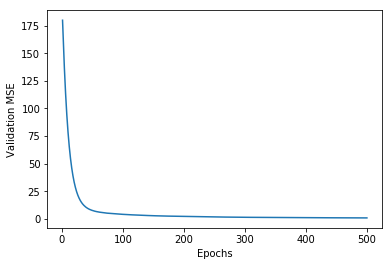

In [18]:
plot_curve(average_mse_history_org)

In [20]:
model_org = build_model()

In [24]:
model_org.fit(train_data, train_targets, epochs = 500, batch_size = 16, verbose=0)
test_mse_score, test_mse_score = model_org.evaluate(test_data, test_targets)

print("test_mse_score", test_mse_score)

102/102 [==============================] - 0s 0us/step
test_mse_score 13.267143473905676


In [34]:
model_org.fit(train_data, train_targets, epochs = 500, batch_size = 64, verbose=0)
test_mse_score, test_mse_score = model_org.evaluate(test_data, test_targets)

print("test_mse_score", test_mse_score)

102/102 [==============================] - 0s 0us/step
test_mse_score 13.935257780785655


Try on different models
- Adding a dense layer

In [25]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

In [26]:
all_mse_histories_more = train_model()
average_mse_history_more = [np.mean([x[i] for x in all_mse_histories_more]) for i in range(num_epochs)]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


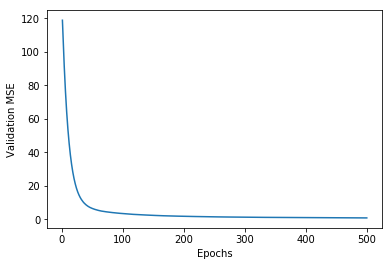

In [27]:
plot_curve(average_mse_history_more)

In [28]:
model_more = build_model()

In [33]:
model_more.fit(train_data, train_targets, epochs=500, batch_size=16, verbose=0)
test_mse_score, test_mse_score = model_more.evaluate(test_data, test_targets)

print("test_mse_score", test_mse_score)

102/102 [==============================] - 0s 0us/step
test_mse_score 12.586411719228707


In [32]:
model_more.fit(train_data, train_targets, epochs=500, batch_size=64, verbose=0)
test_mse_score, test_mse_score = model_more.evaluate(test_data, test_targets)

print("test_mse_score", test_mse_score)

102/102 [==============================] - 0s 68us/step
test_mse_score 13.877640069699755


Try on different models
- Adding dropout layers

In [35]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

In [36]:
all_mse_histories_dropout = train_model()
average_mse_history_dropout = [np.mean([x[i] for x in all_mse_histories_dropout]) for i in range(num_epochs)]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


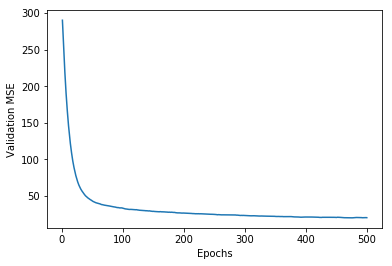

In [37]:
plot_curve(average_mse_history_dropout)

In [38]:
model_dropout = build_model()

In [42]:
model_dropout.fit(train_data, train_targets, epochs=500, batch_size=16, verbose=0)
test_mse_score, test_mse_score = model_dropout.evaluate(test_data, test_targets)

print("test_mse_score", test_mse_score)

102/102 [==============================] - 0s 49us/step
test_mse_score 19.377425848268995


In [40]:
model_dropout.fit(train_data, train_targets, epochs=500, batch_size=64, verbose=0)
test_mse_score, test_mse_score = model_dropout.evaluate(test_data, test_targets)

print("test_mse_score", test_mse_score)

102/102 [==============================] - 0s 67us/step
test_mse_score 17.436082578172872


Try on different models
- Adding penalty

In [46]:
from keras import regularizers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

In [47]:
all_mse_histories_penalty = train_model()
average_mse_history_penalty = [np.mean([x[i] for x in all_mse_histories_penalty]) for i in range(num_epochs)]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


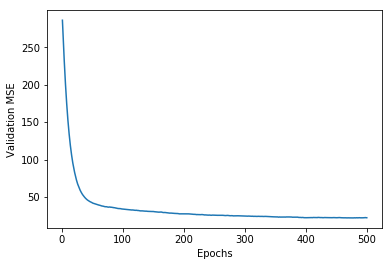

In [48]:
plot_curve(average_mse_history_penalty)

In [49]:
model_penalty = build_model()

In [50]:
model_penalty.fit(train_data, train_targets, epochs=500, batch_size=16, verbose=0)
test_mse_score, test_mse_score = model_penalty.evaluate(test_data, test_targets)

print("test_mse_score", test_mse_score)

102/102 [==============================] - 0s 4ms/step
test_mse_score 17.785012338675706


**The best model is here!**

In [51]:
model_more.fit(train_data, train_targets, epochs=500, batch_size=16, verbose=0)
test_mse_score, test_mse_score = model_more.evaluate(test_data, test_targets)

print("The best test_mse_score", test_mse_score)

102/102 [==============================] - 0s 142us/step
The best test_mse_score 12.933781044155944
